# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [7]:
# @@@ 1
# Your Code
unique_years = df['YEAR'].nunique()
print(unique_years)

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

Ohio

In [8]:
# @@@ 2
# Filter data for Michigan and Ohio for Grade 4 Math scores
selected_test = 'AVG_MATH_4_SCORE'

# Calculate the average scores for Michigan and Ohio
michigan_avg = df[df['STATE'] == 'MICHIGAN'][selected_test].mean()
ohio_avg = df[df['STATE'] == 'OHIO'][selected_test].mean()

michigan_avg, ohio_avg

(np.float64(234.36363636363637), np.float64(239.45454545454547))

Find the average for your chosen test across all states in 2019

In [9]:
# @@@ 3
# Filter data for the year 2019 and calculate the average Grade 4 Math score
average_2019 = df[df['YEAR'] == 2019][selected_test].mean()
average_2019

np.float64(239.9433962264151)

For each state, find a maximum value for your chosen test score

In [10]:
# @@@ 4
# Find the maximum Grade 4 Math score for each state
max_scores_by_state = df.groupby('STATE')[selected_test].max().dropna()

# Display the results
max_scores_by_state

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [11]:
# @@@ 5
# Create expenditure per student feature
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']

# Create revenue per student feature
df['REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL']

# Calculate proportion of revenue sources
df['FEDERAL_REVENUE_PCT'] = df['FEDERAL_REVENUE'] / df['TOTAL_REVENUE']
df['STATE_REVENUE_PCT'] = df['STATE_REVENUE'] / df['TOTAL_REVENUE']
df['LOCAL_REVENUE_PCT'] = df['LOCAL_REVENUE'] / df['TOTAL_REVENUE']

# Inspect new features
new_features = df[['EXPENDITURE_PER_STUDENT', 'REVENUE_PER_STUDENT',
                   'FEDERAL_REVENUE_PCT', 'STATE_REVENUE_PCT', 'LOCAL_REVENUE_PCT']].describe()

new_features

,EXPENDITURE_PER_STUDENT,REVENUE_PER_STUDENT,FEDERAL_REVENUE_PCT,STATE_REVENUE_PCT,LOCAL_REVENUE_PCT
count,1224.000000,1224.000000,1275.000000,1275.000000,1275.000000
mean,10.223925,10.187222,0.087461,0.485203,0.427336
std,4.057989,4.102953,0.034264,0.143033,0.150038
min,3.542816,3.543637,0.029171,0.000000,0.016026
25%,7.232154,7.216431,0.060887,0.397461,0.323091
50%,9.574723,9.381723,0.081257,0.476701,0.435714
75%,12.031768,12.048990,0.108235,0.577169,0.525479
max,29.616741,29.948695,0.222830,0.906335,0.932618


Feature engineering justification: I created these features to explore how financial factors impact Grade 4 Math scores. Expenditure per student and revenue per student help assess resource availability, while revenue proportions (federal, state, local) reveal funding dependencies that may affect performance.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

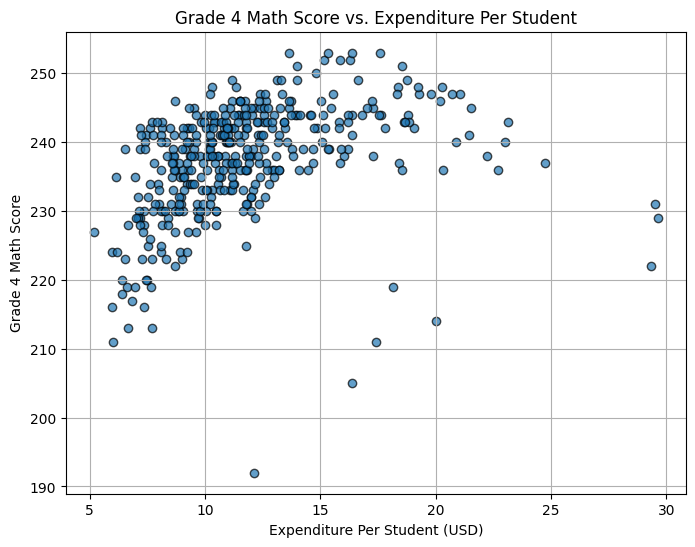

In [12]:
# @@@ 6
import matplotlib.pyplot as plt

# Visualization 1: Relationship between expenditure per student and Grade 4 Math scores
plt.figure(figsize=(8, 6))
plt.scatter(df['EXPENDITURE_PER_STUDENT'],
            df[selected_test], alpha=0.7, edgecolors='k')
plt.title('Grade 4 Math Score vs. Expenditure Per Student')
plt.xlabel('Expenditure Per Student (USD)')
plt.ylabel('Grade 4 Math Score')
plt.grid(True)
plt.show()

Grade 4 Math Score Vs. Expenditure Per Student

**Visualization 2**

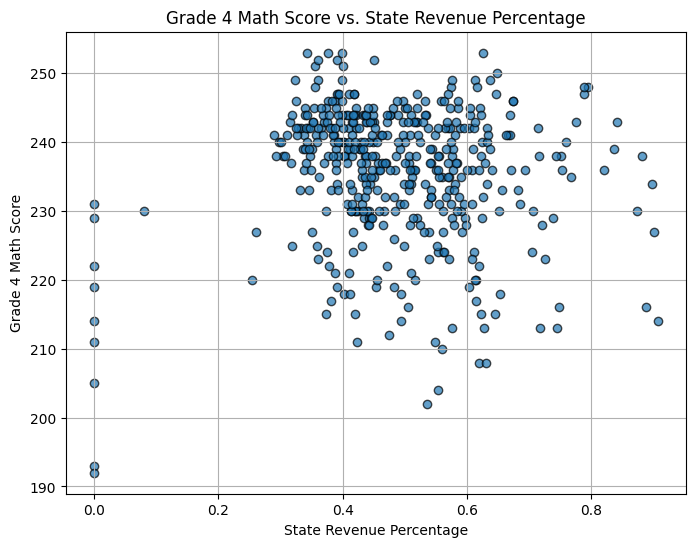

In [13]:
# @@@ 7
# Visualization 2: Relationship between state revenue percentage and Grade 4 Math scores
plt.figure(figsize=(8, 6))
plt.scatter(df['STATE_REVENUE_PCT'], df[selected_test],
            alpha=0.7, edgecolors='k')
plt.title('Grade 4 Math Score vs. State Revenue Percentage')
plt.xlabel('State Revenue Percentage')
plt.ylabel('Grade 4 Math Score')
plt.grid(True)
plt.show()

Grade 4 Math Score Vs. State Revenue Percentage

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# @@@ 8

# Define features (X) and target (y)
X = df[['EXPENDITURE_PER_STUDENT', 'REVENUE_PER_STUDENT',
        'FEDERAL_REVENUE_PCT', 'STATE_REVENUE_PCT', 'LOCAL_REVENUE_PCT']]
y = df['AVG_MATH_4_SCORE']

In [16]:
# @@@ 9 

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [18]:
# @@@ 10
# import your sklearn class here
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data again after imputing
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42)

In [20]:
# @@@ 11
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Impute missing values in y with the mean
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Create a pipeline to handle missing values and train the model
model = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values with mean
    LinearRegression()  # Linear Regression model
)

# Fit the model to the training data
model.fit(X_train, y_imputed[:len(X_train)])

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [22]:
# Impute missing values in y_train with the mean
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Fit the model to the training data
model.fit(X_train, y_train_imputed)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [23]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [26]:
# @@@ 12
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Impute missing values in y_test with the mean
y_test_imputed = imputer_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_imputed, y_pred)
mse = mean_squared_error(y_test_imputed, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_imputed, y_pred)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



Mean Absolute Error (MAE): 6.39
Mean Squared Error (MSE): 4868.45
Root Mean Squared Error (RMSE): 69.77
R² Score: -220.09


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

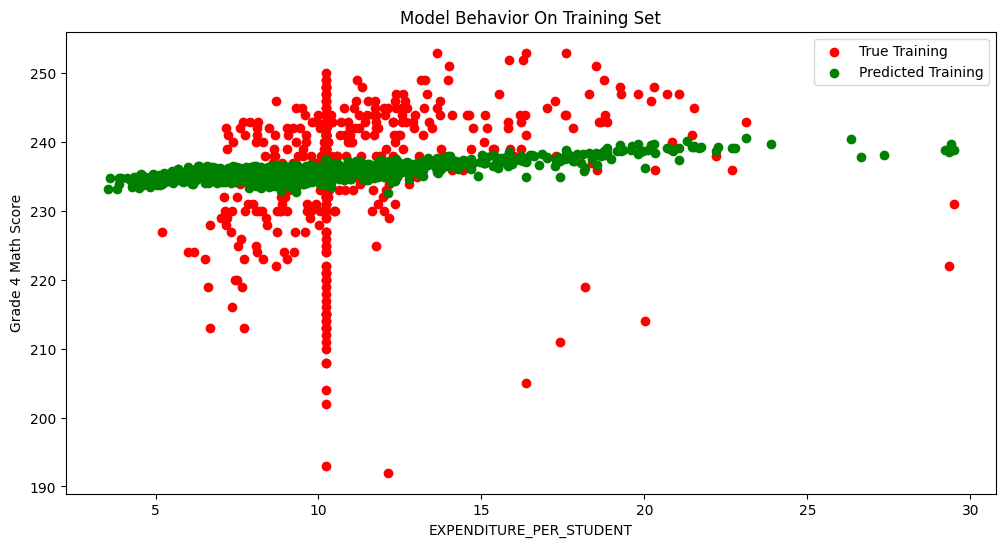

In [28]:
# @@@ 13

# Choose a predictor column
col_name = 'EXPENDITURE_PER_STUDENT'

# Convert X_train back to DataFrame to use column names
X_train_df = pd.DataFrame(X_train, columns=['EXPENDITURE_PER_STUDENT', 'REVENUE_PER_STUDENT',
											'FEDERAL_REVENUE_PCT', 'STATE_REVENUE_PCT', 'LOCAL_REVENUE_PCT'])

# Create the scatter plot for training data
f = plt.figure(figsize=(12, 6))
plt.scatter(X_train_df[col_name], y_train, color="red")
plt.scatter(X_train_df[col_name], model.predict(X_train), color="green")

# Add labels and title
plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Math Score')
plt.title("Model Behavior On Training Set")

plt.show()

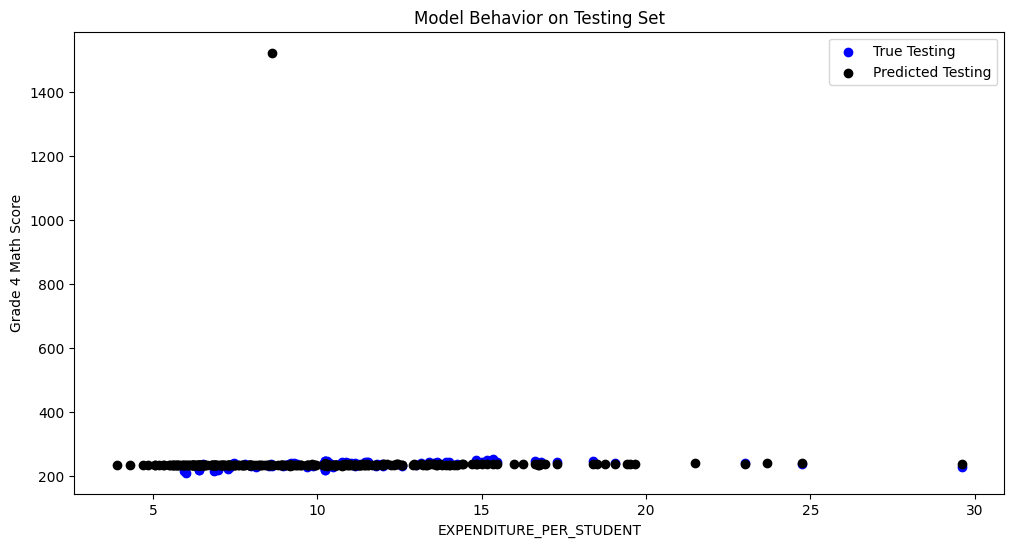

In [30]:
# @@@ 14

# Choose a predictor column
col_name = 'EXPENDITURE_PER_STUDENT'

# Convert X_test back to DataFrame to use column names
X_test_df = pd.DataFrame(X_test, columns=['EXPENDITURE_PER_STUDENT', 'REVENUE_PER_STUDENT',
										  'FEDERAL_REVENUE_PCT', 'STATE_REVENUE_PCT', 'LOCAL_REVENUE_PCT'])

# Create the scatter plot for testing data
f = plt.figure(figsize=(12, 6))
plt.scatter(X_test_df[col_name], y_test, color="blue")
plt.scatter(X_test_df[col_name], model.predict(X_test), color="black")

# Add labels and title
plt.legend(['True Testing', 'Predicted Testing'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Math Score')
plt.title("Model Behavior on Testing Set")

plt.show()